<div align="center">
  <h2>Міністерство освіти і науки України</h2>
  <h2>Національний технічний університет України</h2>
  <h2>«Київський політехнічний інститут ім. Ігоря Сікорського»</h2>
  <h2>Факультет інформатики та обчислювальної техніки</h2>
  <h2>Кафедра обчислювальної техніки</h2>
  <br>
</div>

<div align="right">
    <br>
    <br>
<center>    
<h2>Лабораторна робота №6</h2>
</center>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
Виконав: <br>
Студент ІІ курсу ФІОТ <br>
групи ІО-34 <br>
Рибачок Михайло Володимирович <br>
Номер у списку - 17 <br><br>

<center>
Київ - 2025
</center>

<br>
</div>

## Тема: 
Машина Тьюринга
## Мета: 
Метою даного заняття є закріплення знань з побудови та роботи машин
Тьюринга, які є математичними (формальними) моделями алгоритмів.
## Завдання:
Відповідно до варіанту написати програму для машини Тьюринга.

### Варіант 17:
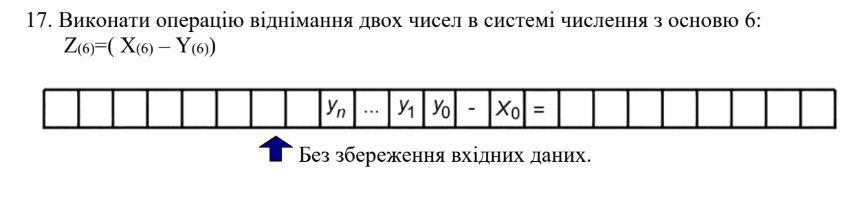

## Код програми:

In [22]:
class TuringMachine:
    def __init__(self):
        # Ініціалізація машини Тьюрінга для віднімання в системі з основою 6
        self.tape = []  # стрічка
        self.head_position = 0  
        self.state = 'q0'  # початковий стан
        self.final_state = 'qf'  # кінцевий стан

        # Таблиця переходів: {(стан, символ): (новий_стан, новий_символ, рух)}
        # Рух: 'L' - вліво, 'R' - вправо, 'S' - залишитись на місці
        self.transition_table = self.create_transition_table()

    def create_transition_table(self):
        table = {}

        # Алфавіт системи числення з основою 6: 0, 1, 2, 3, 4, 5
        # Також використовуємо ' ' (пробіл) як роздільник і '#' як маркер

        # q0 - початковий стан: шукаємо крайню праву цифру другого числа
        table[('q0', '0')] = ('q0', '0', 'R')
        table[('q0', '1')] = ('q0', '1', 'R')
        table[('q0', '2')] = ('q0', '2', 'R')
        table[('q0', '3')] = ('q0', '3', 'R')
        table[('q0', '4')] = ('q0', '4', 'R')
        table[('q0', '5')] = ('q0', '5', 'R')
        table[('q0', ' ')] = ('q0', ' ', 'R')
        table[('q0', '#')] = ('q1', '#', 'L')
        table[('q0', None)] = ('q1', '#', 'L')

        # q1 - повернулись до останньої цифри другого числа, починаємо віднімання
        table[('q1', '0')] = ('q2', '#', 'L')
        table[('q1', '1')] = ('q3', '#', 'L')
        table[('q1', '2')] = ('q4', '#', 'L')
        table[('q1', '3')] = ('q5', '#', 'L')
        table[('q1', '4')] = ('q6', '#', 'L')
        table[('q1', '5')] = ('q7', '#', 'L')
        table[('q1', ' ')] = ('q8', ' ', 'L')
        table[('q1', '#')] = ('q8', '#', 'L')

        #запам'ятали 0
        table[('q2', ' ')] = ('q2', ' ', 'L')
        table[('q2', '0')] = ('q9', '0', 'L')
        table[('q2', '1')] = ('q9', '1', 'L')
        table[('q2', '2')] = ('q9', '2', 'L')
        table[('q2', '3')] = ('q9', '3', 'L')
        table[('q2', '4')] = ('q9', '4', 'L')
        table[('q2', '5')] = ('q9', '5', 'L')

        # q3 - запам'ятали 1
        table[('q3', ' ')] = ('q3', ' ', 'L')
        table[('q3', '0')] = ('q10', '5', 'L')
        table[('q3', '1')] = ('q9', '0', 'L')
        table[('q3', '2')] = ('q9', '1', 'L')
        table[('q3', '3')] = ('q9', '2', 'L')
        table[('q3', '4')] = ('q9', '3', 'L')
        table[('q3', '5')] = ('q9', '4', 'L')

        # q4 - запам'ятали 2
        table[('q4', ' ')] = ('q4', ' ', 'L')
        table[('q4', '0')] = ('q10', '4', 'L')
        table[('q4', '1')] = ('q10', '5', 'L')
        table[('q4', '2')] = ('q9', '0', 'L')
        table[('q4', '3')] = ('q9', '1', 'L')
        table[('q4', '4')] = ('q9', '2', 'L')
        table[('q4', '5')] = ('q9', '3', 'L')

        # q5 - запам'ятали 3
        table[('q5', ' ')] = ('q5', ' ', 'L')
        table[('q5', '0')] = ('q10', '3', 'L')
        table[('q5', '1')] = ('q10', '4', 'L')
        table[('q5', '2')] = ('q10', '5', 'L')
        table[('q5', '3')] = ('q9', '0', 'L')
        table[('q5', '4')] = ('q9', '1', 'L')
        table[('q5', '5')] = ('q9', '2', 'L')

        # q6 - запам'ятали 4
        table[('q6', ' ')] = ('q6', ' ', 'L')
        table[('q6', '0')] = ('q10', '2', 'L')
        table[('q6', '1')] = ('q10', '3', 'L')
        table[('q6', '2')] = ('q10', '4', 'L')
        table[('q6', '3')] = ('q10', '5', 'L')
        table[('q6', '4')] = ('q9', '0', 'L')
        table[('q6', '5')] = ('q9', '1', 'L')

        # q7 - запам'ятали 5
        table[('q7', ' ')] = ('q7', ' ', 'L')
        table[('q7', '0')] = ('q10', '1', 'L')
        table[('q7', '1')] = ('q10', '2', 'L')
        table[('q7', '2')] = ('q10', '3', 'L')
        table[('q7', '3')] = ('q10', '4', 'L')
        table[('q7', '4')] = ('q10', '5', 'L')
        table[('q7', '5')] = ('q9', '0', 'L')

        # q8 - перейшли до кінця другого чсла, переходимо до чистки
        table[('q8', '0')] = ('q8', '0', 'L')
        table[('q8', '1')] = ('q8', '1', 'L')
        table[('q8', '2')] = ('q8', '2', 'L')
        table[('q8', '3')] = ('q8', '3', 'L')
        table[('q8', '4')] = ('q8', '4', 'L')
        table[('q8', '5')] = ('q8', '5', 'L')
        table[('q8', None)] = ('q11', None, 'R')

        # q9 - немає потреби позичати, знаходимо наступну цифру
        table[('q9', '0')] = ('q9', '0', 'L')
        table[('q9', '1')] = ('q9', '1', 'L')
        table[('q9', '2')] = ('q9', '2', 'L')
        table[('q9', '3')] = ('q9', '3', 'L')
        table[('q9', '4')] = ('q9', '4', 'L')
        table[('q9', '5')] = ('q9', '5', 'L')
        table[('q9', ' ')] = ('q9', ' ', 'L')
        table[('q9', None)] = ('q11', None, 'R')

        # q10 - потрібно позичити, знаходимо попередній розряд
        table[('q10', '0')] = ('q10a', '5', 'L')
        table[('q10', '1')] = ('q9', '0', 'L')
        table[('q10', '2')] = ('q9', '1', 'L')
        table[('q10', '3')] = ('q9', '2', 'L')
        table[('q10', '4')] = ('q9', '3', 'L')
        table[('q10', '5')] = ('q9', '4', 'L')
        table[('q10', ' ')] = ('q14', ' ', 'L') 
        table[('q10', None)] = ('q14', None, 'R')

        # q10a - рекурсивне позичання (0 стало 5, але потрібно віднімати 1 з наступного розряду)
        table[('q10a', '0')] = ('q10a', '5', 'L')
        table[('q10a', '1')] = ('q9', '0', 'L')
        table[('q10a', '2')] = ('q9', '1', 'L')
        table[('q10a', '3')] = ('q9', '2', 'L')
        table[('q10a', '4')] = ('q9', '3', 'L')
        table[('q10a', '5')] = ('q9', '4', 'L')
        table[('q10a', ' ')] = ('q14', ' ', 'L')
        table[('q10a', None)] = ('q14', None, 'R')

        # q11 - очищення: форматуємо результат і йдемо до кінця числа
        table[('q11', '0')] = ('q11', '0', 'R')
        table[('q11', '1')] = ('q11', '1', 'R')
        table[('q11', '2')] = ('q11', '2', 'R')
        table[('q11', '3')] = ('q11', '3', 'R')
        table[('q11', '4')] = ('q11', '4', 'R')
        table[('q11', '5')] = ('q11', '5', 'R')
        table[('q11', ' ')] = ('q12', ' ', 'R')

        # q12 - видалення другого числа
        table[('q12', '0')] = ('q12', ' ', 'R')
        table[('q12', '1')] = ('q12', ' ', 'R')
        table[('q12', '2')] = ('q12', ' ', 'R')
        table[('q12', '3')] = ('q12', ' ', 'R')
        table[('q12', '4')] = ('q12', ' ', 'R')
        table[('q12', '5')] = ('q12', ' ', 'R')
        table[('q12', '#')] = ('q12', ' ', 'R')
        table[('q12', None)] = ('q13', None, 'L')

        # q13 - видалення зайвих пробілів в кінці
        table[('q13', ' ')] = ('q13', ' ', 'L')
        table[('q13', '#')] = ('q13', ' ', 'L')
        table[('q13', '0')] = ('qf', '0', 'S')
        table[('q13', '1')] = ('qf', '1', 'S')
        table[('q13', '2')] = ('qf', '2', 'S')
        table[('q13', '3')] = ('qf', '3', 'S')
        table[('q13', '4')] = ('qf', '4', 'S')
        table[('q13', '5')] = ('qf', '5', 'S')
        table[('q13', None)] = ('q15', None, 'R')

        # q14 - обробка випадку, коли результат від'ємний (Y > X)
        table[('q14', ' ')] = ('q14', ' ', 'L')
        table[('q14', None)] = ('q15', None, 'R')

        table[('q15', None)] = ('qf', '0', 'S')

        return table

    def load_tape(self, input_str):
        """Завантаження вхідних даних на стрічку"""
        self.tape = list(input_str)
        self.head_position = 0
        self.state = 'q0'

    def read_symbol(self):
        """Читання символу з поточної позиції головки"""
        if 0 <= self.head_position < len(self.tape):
            return self.tape[self.head_position]
        return None

    def write_symbol(self, symbol):
        """Запис символу в поточну позицію головки"""
        if symbol is not None:
            # Розширюємо стрічку при необхідності
            while self.head_position >= len(self.tape):
                self.tape.append(' ')

            if self.head_position < 0:
                self.tape = [' '] + self.tape
                self.head_position = 0

            self.tape[self.head_position] = symbol

    def move_head(self, direction):
        """Переміщення головки згідно з напрямком"""
        if direction == 'L':
            self.head_position -= 1
        elif direction == 'R':
            self.head_position += 1

    def step(self):
        """Виконання одного кроку машини Тьюрінга"""
        current_symbol = self.read_symbol()

        if (self.state, current_symbol) in self.transition_table:
            new_state, new_symbol, move_direction = self.transition_table[(self.state, current_symbol)]

            self.write_symbol(new_symbol)
            self.move_head(move_direction)
            self.state = new_state

            return True
        else:
            print(f"Помилка: немає переходу для стану {self.state} і символу {current_symbol}")
            return False

    def run(self, debug=False):
        """Запуск машини Тьюрінга до досягнення кінцевого стану"""
        steps = 0
        while self.state != self.final_state:
            if debug:
                print(
                    f"Стан: {self.state}, Стрічка: {''.join(self.tape)}, Позиція: {self.head_position}, Символ: {self.read_symbol()}")

            if not self.step():
                break
            steps += 1

            if steps > 10000:
                print("Перевищено максимальну кількість кроків. Можливо, машина зациклилась.")
                break

        return ''.join(self.tape).strip()


def subtract_in_base6(x, y, debug=False):
    """Функція для віднімання двох чисел у системі числення з основою 6
    
    Параметри:
    x (str): перше число (зменшуване) у системі з основою 6
    y (str): друге число (від'ємник) у системі з основою 6
    debug (bool): якщо True, виводить детальну інформацію про роботу машини
    
    Повертає:
    str: результат віднімання у системі з основою 6
    """
    # Перевірка валідності веденя
    for digit in x + y:
        if digit not in '012345':
            raise ValueError(f"Невірний символ '{digit}'. Вхідні числа повинні містити лише цифри 0-5.")
    
    tm = TuringMachine()
    
    input_with_marker = f"{x} {y}#"
    
    tm.load_tape(input_with_marker)
    result = tm.run(debug=debug)
    
    clean_result = ''.join([c for c in result if c in '012345']).lstrip('0')
    if not clean_result:
        clean_result = '0'
    
    # перевірка
    x_decimal = int(x, 6)
    y_decimal = int(y, 6)
    
    if x_decimal >= y_decimal:
        expected = x_decimal - y_decimal
        expected_base6 = ''
        if expected == 0:
            expected_base6 = '0'
        else:
            temp = expected
            while temp > 0:
                expected_base6 = str(temp % 6) + expected_base6
                temp //= 6
        
        if debug:
            print(f"Перевірка: {x}₆ - {y}₆ = {expected_base6}₆ ({x_decimal}₁₀ - {y_decimal}₁₀ = {expected}₁₀)")
    else:
        if debug:
            print(f"Попередження: X ({x}₆ = {x_decimal}₁₀) менше ніж Y ({y}₆ = {y_decimal}₁₀).")
            print("Результат буде встановлено у 0, оскільки машина не підтримує від'ємні числа.")
    
    return clean_result

## Перевірка коду:

In [23]:
result = subtract_in_base6("12", "5")  # 12₆ - 5₆ = 3₆ (8₁₀ - 5₁₀ = 3₁₀)
print(f"Результат: {result}")
print("________________________")

# інший приклад з детальним виведенням
result = subtract_in_base6("21", "4", debug=True)  # 21₆ - 4₆ = 13₆ (13₁₀ - 4₁₀ = 9₁₀ = 13₆)
print(f"Результат: {result}")
print("________________________")


Результат: 3
________________________
Стан: q0, Стрічка: 21 4#, Позиція: 0, Символ: 2
Стан: q0, Стрічка: 21 4#, Позиція: 1, Символ: 1
Стан: q0, Стрічка: 21 4#, Позиція: 2, Символ:  
Стан: q0, Стрічка: 21 4#, Позиція: 3, Символ: 4
Стан: q0, Стрічка: 21 4#, Позиція: 4, Символ: #
Стан: q1, Стрічка: 21 4#, Позиція: 3, Символ: 4
Стан: q6, Стрічка: 21 ##, Позиція: 2, Символ:  
Стан: q6, Стрічка: 21 ##, Позиція: 1, Символ: 1
Стан: q10, Стрічка: 23 ##, Позиція: 0, Символ: 2
Стан: q9, Стрічка: 13 ##, Позиція: -1, Символ: None
Стан: q11, Стрічка: 13 ##, Позиція: 0, Символ: 1
Стан: q11, Стрічка: 13 ##, Позиція: 1, Символ: 3
Стан: q11, Стрічка: 13 ##, Позиція: 2, Символ:  
Стан: q12, Стрічка: 13 ##, Позиція: 3, Символ: #
Стан: q12, Стрічка: 13  #, Позиція: 4, Символ: #
Стан: q12, Стрічка: 13   , Позиція: 5, Символ: None
Стан: q13, Стрічка: 13   , Позиція: 4, Символ:  
Стан: q13, Стрічка: 13   , Позиція: 3, Символ:  
Стан: q13, Стрічка: 13   , Позиція: 2, Символ:  
Стан: q13, Стрічка: 13   , Позиці

# Висновок:

У цій лабораторній роботі було реалізовано машину Тьюринга, яка виконує операцію **віднімання чисел у шістковій системі числення**. Завдяки побудові детальної таблиці переходів забезпечується обробка базових випадків, а також **врахування ситуацій з позичанням**. Реалізація демонструє **можливості МТ для симуляції арифметичних операцій**, підтверджуючи теоретичні властивості обчислювальних моделей.

## Контрольні питання

### 1. Що таке Машина Тьюринга?

Машина Тьюринга (МТ) — це абстрактна математична модель обчислень, запропонована Аланом Тьюрингом у 1936 році. Вона складається з нескінченної стрічки, поділеної на комірки, яка може містити символи з деякого алфавіту, головки для читання/запису, що може пересуватись вліво або вправо, та скінченної множини станів. Машина працює за чітко визначеним набором правил — програмою переходів. МТ здатна моделювати будь-який алгоритм, і є фундаментальною моделлю обчислювального пристрою.

---

### 2. За якими правилами працює Машина Тьюринга?

На кожному кроці роботи машина виконує такі дії згідно з таблицею переходів:
1. Зчитує символ з поточної комірки стрічки.
2. Залежно від зчитаного символу та поточного стану машини, визначається команда:
   - новий символ, який потрібно записати в ту саму комірку;
   - напрямок руху головки (вліво, вправо або залишитись на місці);
   - новий стан, у який переходить машина.
Цикл повторюється, поки машина не досягне кінцевого (завершального) стану. Таким чином, МТ виконує послідовні кроки обчислення згідно з наперед заданою логікою.

---

### 3. Для чого використовують Машину Тьюринга?

Машину Тьюринга застосовують як теоретичний інструмент у таких напрямках:
- **Формалізація алгоритмів** — доведення того, що певна задача розв'язується алгоритмічно.
- **Аналіз обчислюваності** — виявлення меж можливостей обчислень: які задачі принципово неможливо обчислити.
- **Теорія складності** — класифікація задач за обчислювальними ресурсами (час, пам’ять).
- **Побудова компіляторів та інтерпретаторів** — на базовому рівні МТ є спрощеною моделлю комп’ютера.
- **Навчання** — для розуміння базових принципів логіки програмування та обчислень.

---

### 4. Які основні множини використовуються в Машині Тьюринга?

У Машині Тьюринга використовуються такі основні множини:
- **Σ (сигма)** — вхідний алфавіт, множина допустимих символів, які можуть з’явитись на початку на стрічці.
- **Γ (гама)** — робочий алфавіт, який включає всі символи, які може містити стрічка (включаючи службові, наприклад пробіл або порожній символ `_`).
- **Q** — множина всіх можливих станів машини, включаючи початковий та один або кілька завершальних станів.
- **δ (дельта)** — функція переходів, яка визначає правила поведінки машини: `δ(q, a) = (q', b, D)`, де `q` — поточний стан, `a` — вхідний символ, `q'` — новий стан, `b` — символ, який записується, `D` — напрям руху (L або R).
- **q₀** — початковий стан.
- **F** — множина завершальних (приймаючих) станів.

---

### 5. Які операції виконує машина Тьюринга під час одного кроку обчислень?

Під час одного кроку виконання програми МТ здійснює:
1. **Зчитування символу** з поточної комірки стрічки.
2. **Пошук відповідної команди** в таблиці переходів на основі поточного стану та прочитаного символу.
3. **Виконання дії**:
   - Запис нового символу в ту ж комірку (можливо, той самий).
   - Переміщення головки на одну позицію ліворуч або праворуч (або залишення на місці).
   - Зміна поточного стану машини.
Цей набір дій називається **елементарним кроком обчислення**. Послідовність таких кроків призводить до виконання певної обчислювальної задачі.


